# Mini-Project: Risk of Heart Disease

Heart Disease has remained the number one cause of death internationally for the past few decades. It accounts for about 32% of all global deaths in 2019. The harsh fact inspired us to create a model to predict one's risk of heart disease for better awareness. Prevention is better than cure.

Dataset from Kaggle : "Heart Failure Prediction Dataset" by Fedesoriano
Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [2]:
heartData = pd.read_csv('heart.csv')
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


---

## Exploratory Data Analysis

### Correlation of Numerical Variables with HeartDisease

In [4]:
heartNum = heartData[["Age", "RestingBP", "Cholesterol", "FastingBS","MaxHR", "Oldpeak", "HeartDisease",]]
heartNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


In [5]:
heartNum.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


### Age
(Years)

<AxesSubplot:xlabel='Age', ylabel='Count'>

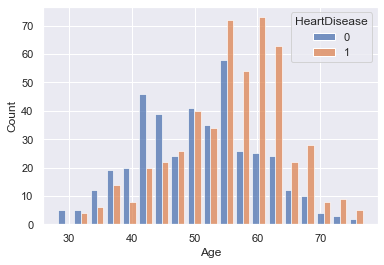

In [6]:
sb.histplot(x=heartData["Age"], hue=heartData["HeartDisease"], data=heartData,multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

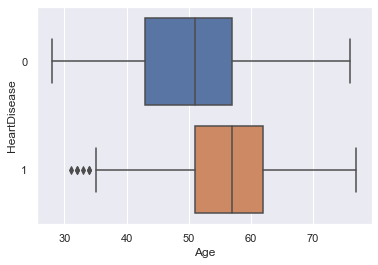

In [7]:
sb.boxplot(x=heartData["Age"], y=heartData["HeartDisease"], data=heartData, orient = "h")

We observe that our risk of heart diesease is higher when we age as the prevalence of heart disease increases as age increases.

### RestingBP: Resting Blood Pressure 
(mmHg)

<AxesSubplot:xlabel='RestingBP', ylabel='HeartDisease'>

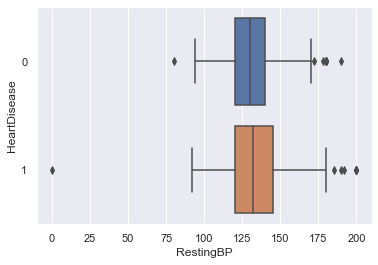

In [8]:
sb.boxplot(x=heartData["RestingBP"], y=heartData["HeartDisease"], data=heartData, orient = "h")

We observe that those with heart disease generally have slightly higher resting blood pressure level.

### Cholesterol: Serum Cholesterol 
(mg/dL)

<AxesSubplot:xlabel='Cholesterol', ylabel='HeartDisease'>

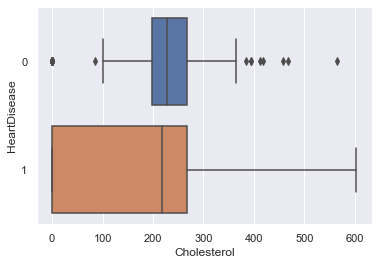

In [9]:
sb.boxplot(x=heartData["Cholesterol"], y=heartData["HeartDisease"], data=heartData, orient = "h")

We observe that some data is missing.

### FastingBS: Fasting Blood Sugar 
(1 = > 120 mg/dl; 0 = < 120 mg/dl)

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

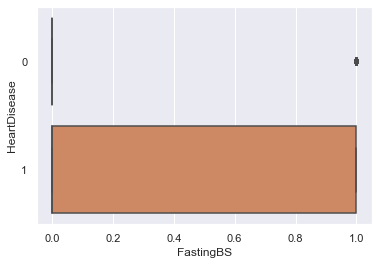

In [10]:
sb.boxplot(x=heartData["FastingBS"], y=heartData["HeartDisease"], data=heartData, orient = "h")

We observe that those with heart disease tend to have more than 120 mg/dl fasting blood sugar level.

### MaxHR: Max Heart Rate 
(bpm)

<AxesSubplot:xlabel='MaxHR', ylabel='HeartDisease'>

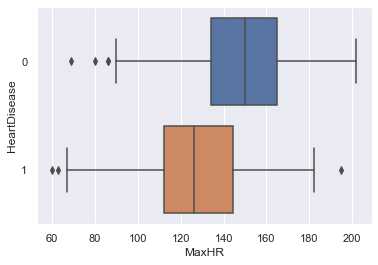

In [11]:
sb.boxplot(x=heartData["MaxHR"], y=heartData["HeartDisease"], data=heartData, orient = "h")

We observe that those with lower max heart rate is at higher risk of heart disease.

### Old Peak: ST Depression Induced by Exercise Relative to Rest

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

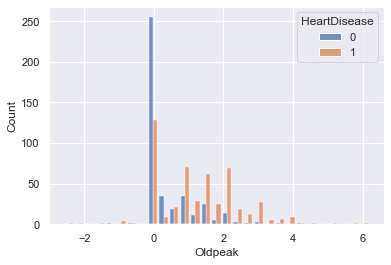

In [12]:
sb.histplot(x=heartData["Oldpeak"], hue=heartData["HeartDisease"], data=heartData,multiple="dodge", shrink=.8)

We observe that as the old peak value increase, the risk of heart disease increases as well.

### Sex
(M = Male; F = Female)

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

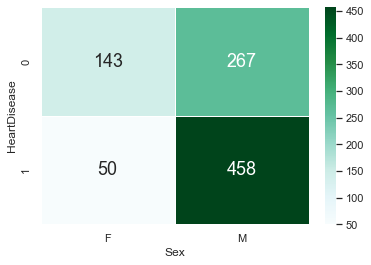

In [13]:
sb.heatmap(heartData.groupby(['HeartDisease', 'Sex']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

We observe that male individuals tend to be at higher risk of heart disease.

### Chest Pain Type 
(TA = Typical Angina; ATA = Atypical Angina; NAP = Non-Anginal Pain; ASY = Asymptomatic)

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

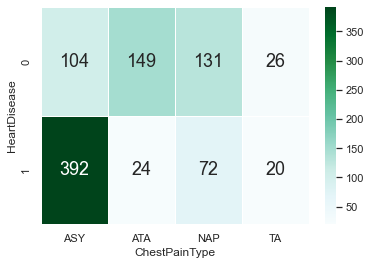

In [14]:
sb.heatmap(heartData.groupby(['HeartDisease', 'ChestPainType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

We observe that those with asymptomatic chest pain tend to be of higher risk of heart disease.

### RestingECG: Resting Electrocardiographic
(Normal; LVH = Left Ventricular Hypertrophy; ST = ST-T Wave Abnormality)

<AxesSubplot:xlabel='RestingECG', ylabel='HeartDisease'>

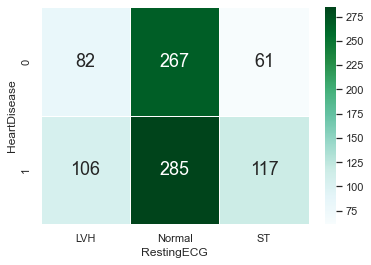

In [15]:
sb.heatmap(heartData.groupby(['HeartDisease', 'RestingECG']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### ExerciseAngina: Exercise Induced Angina
(T = True; F = False)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>

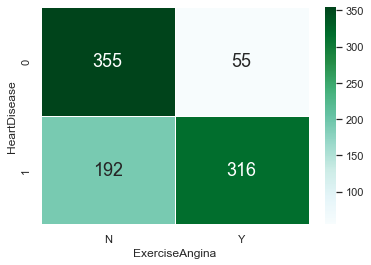

In [16]:
sb.heatmap(heartData.groupby(['HeartDisease', 'ExerciseAngina']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

We observe that having exercise induced angina puts us at higher risk of heart disease.

### ST Slope: The Slope of The Peak Exercise ST Segment
(Flat; Up = Upsloping; Down = Downsloping)

<AxesSubplot:xlabel='ST_Slope', ylabel='HeartDisease'>

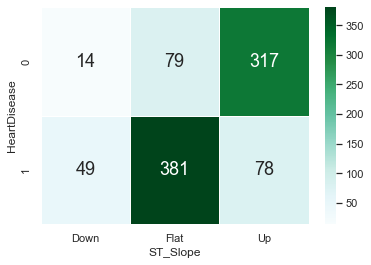

In [17]:
sb.heatmap(heartData.groupby(['HeartDisease', 'ST_Slope']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

We observe that those with flat ST slope are at higher risk of heart disease.

---

## Data Preparation and Cleaning

Replacing object items as string

In [18]:
heartData['Sex'] = heartData['Sex'].astype("string")
heartData['ChestPainType'] = heartData['ChestPainType'].astype("string")
heartData['RestingECG'] = heartData['RestingECG'].astype("string")
heartData['ExerciseAngina'] = heartData['ExerciseAngina'].astype("string")
heartData['ST_Slope'] = heartData['ST_Slope'].astype("string")

In [19]:
count = (heartData['Cholesterol'] == 0).sum()
count

172

We have identified that out of 918 entries, 172 entries under Cholesterol are 0 values. We have decided to replace them with the median in that column.

In [20]:
heartData['Cholesterol'] = heartData['Cholesterol'].mask(heartData['Cholesterol'] == 0).fillna(heartData['Cholesterol'].median())

In [21]:
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [22]:
count = (heartData['RestingBP'] == 0).sum()
count

1

In [23]:
heartData = heartData.drop(heartData[heartData.RestingBP == 0].index)

We have also observed and removed one row from the data that has RestingBP value of 0.

In [24]:
heartData = heartData.drop(heartData[heartData.Age < 30].index)

We decided to remove rows with Age below 30 as they are outliers for our analysis.

In [25]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             913 non-null    int64  
 1   Sex             913 non-null    string 
 2   ChestPainType   913 non-null    string 
 3   RestingBP       913 non-null    int64  
 4   Cholesterol     913 non-null    float64
 5   FastingBS       913 non-null    int64  
 6   RestingECG      913 non-null    string 
 7   MaxHR           913 non-null    int64  
 8   ExerciseAngina  913 non-null    string 
 9   Oldpeak         913 non-null    float64
 10  ST_Slope        913 non-null    string 
 11  HeartDisease    913 non-null    int64  
dtypes: float64(2), int64(5), string(5)
memory usage: 92.7 KB


So the total number of rows we are going to work with is 913 for our analysis with clean data.

---

## Creating a Model for Heart Disease 

We will build four uni-variate Classification Tree models (of max depth 4) to
predict HeartDisease using the variables Age, RestingBP, Cholesterol, MaxHR. Before that, we will be splitting the data into train set and test set with a partitioning ratio of 75:25.  Train set having of 684 rows and test set having 229 rows.

In [26]:
Age = pd.DataFrame(heartData['Age']) 
RestingBP = pd.DataFrame(heartData['RestingBP']) 
Cholesterol = pd.DataFrame(heartData['Cholesterol'])
MaxHR = pd.DataFrame(heartData['MaxHR'])
HeartDisease = pd.DataFrame(heartData['HeartDisease'])
Agetrain, Agetest , RestingBPtrain, RestingBPtest, Cholesteroltrain, Cholesteroltest, MaxHRtrain, MaxHRtest, HeartDiseasetrain, HeartDiseasetest = train_test_split(Age, RestingBP,Cholesterol, MaxHR, HeartDisease, test_size=0.25,shuffle=True)

#### Decision Tree on Age and Heart Disease

[Text(993.9375, 587.0880000000001, 'Agetrain <= 55.5\ngini = 0.492\nsamples = 684\nvalue = [300, 384]\nclass = 1'),
 Text(558.0, 456.624, 'Agetrain <= 45.5\ngini = 0.493\nsamples = 374\nvalue = [209, 165]\nclass = 0'),
 Text(279.0, 326.1600000000001, 'Agetrain <= 37.5\ngini = 0.436\nsamples = 137\nvalue = [93, 44]\nclass = 0'),
 Text(139.5, 195.69600000000003, 'Agetrain <= 34.5\ngini = 0.358\nsamples = 30\nvalue = [23, 7]\nclass = 0'),
 Text(69.75, 65.23200000000008, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]\nclass = 0'),
 Text(209.25, 65.23200000000008, 'gini = 0.278\nsamples = 18\nvalue = [15, 3]\nclass = 0'),
 Text(418.5, 195.69600000000003, 'Agetrain <= 38.5\ngini = 0.452\nsamples = 107\nvalue = [70, 37]\nclass = 0'),
 Text(348.75, 65.23200000000008, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = 1'),
 Text(488.25, 65.23200000000008, 'gini = 0.417\nsamples = 98\nvalue = [69, 29]\nclass = 0'),
 Text(837.0, 326.1600000000001, 'Agetrain <= 47.5\ngini = 0.5\nsamples = 237\nvalue

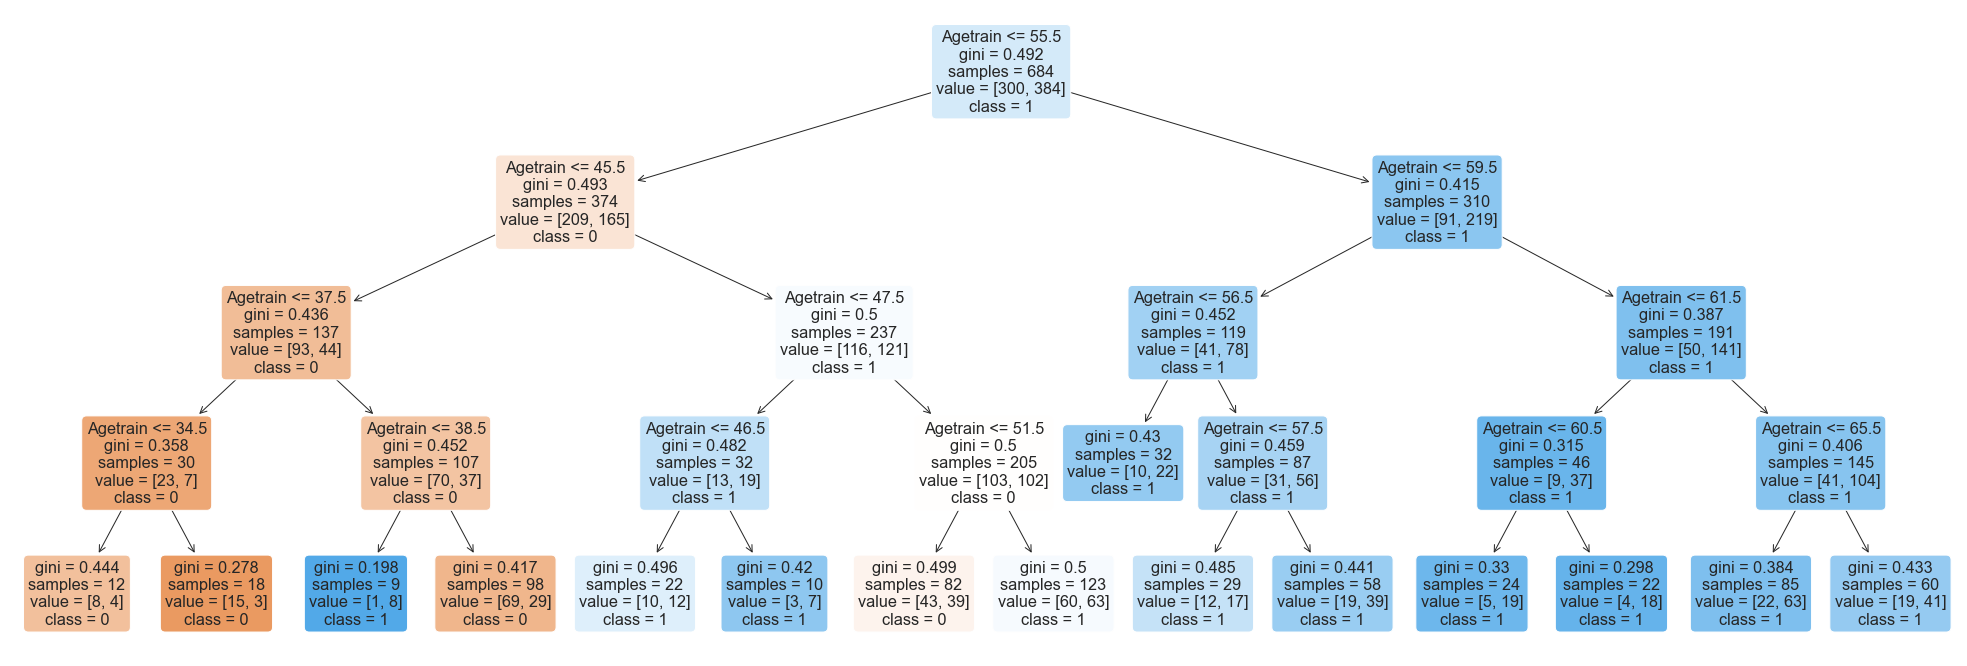

In [27]:
# Decision Tree using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 4)  
dectree1.fit(Agetrain, HeartDiseasetrain)          

f = plt.figure(figsize=(35,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Agetrain"], 
          class_names=["0","1"])

#### Decision Tree on RestingBP and Heart Disease

[Text(710.1818181818181, 587.0880000000001, 'RestingBPtrain <= 140.5\ngini = 0.492\nsamples = 684\nvalue = [300, 384]\nclass = 1'),
 Text(177.54545454545453, 456.624, 'RestingBPtrain <= 94.5\ngini = 0.499\nsamples = 531\nvalue = [254, 277]\nclass = 1'),
 Text(88.77272727272727, 326.1600000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(266.3181818181818, 326.1600000000001, 'RestingBPtrain <= 97.0\ngini = 0.499\nsamples = 528\nvalue = [251, 277]\nclass = 1'),
 Text(177.54545454545453, 195.69600000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(355.09090909090907, 195.69600000000003, 'RestingBPtrain <= 117.0\ngini = 0.499\nsamples = 522\nvalue = [251, 271]\nclass = 1'),
 Text(266.3181818181818, 65.23200000000008, 'gini = 0.488\nsamples = 109\nvalue = [46, 63]\nclass = 1'),
 Text(443.8636363636363, 65.23200000000008, 'gini = 0.5\nsamples = 413\nvalue = [205, 208]\nclass = 1'),
 Text(1242.8181818181818, 456.624, 'RestingBPtrain <= 147.0\ngini = 0.4

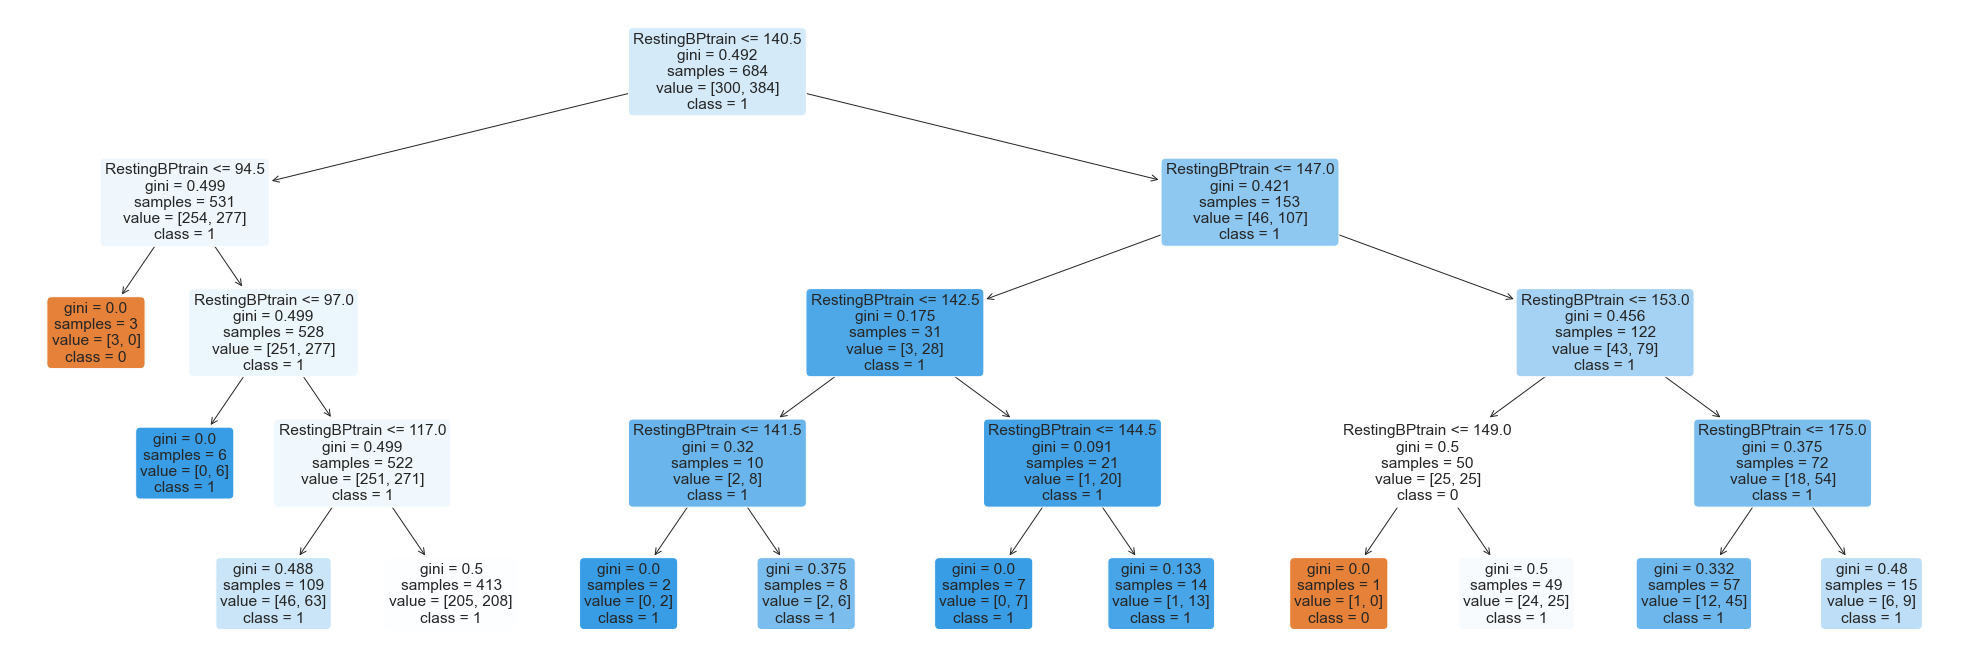

In [28]:
# Decision Tree using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 4)  
dectree2.fit(RestingBPtrain, HeartDiseasetrain)          

f = plt.figure(figsize=(35,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["RestingBPtrain"], 
          class_names=["0","1"])

#### Decision Tree on Cholesterol and Heart Disease

[Text(1032.8365384615383, 587.0880000000001, 'Cholesteroltrain <= 221.5\ngini = 0.492\nsamples = 684\nvalue = [300, 384]\nclass = 1'),
 Text(600.9230769230769, 456.624, 'Cholesteroltrain <= 201.5\ngini = 0.486\nsamples = 206\nvalue = [120, 86]\nclass = 0'),
 Text(300.46153846153845, 326.1600000000001, 'Cholesteroltrain <= 193.5\ngini = 0.468\nsamples = 115\nvalue = [72, 43]\nclass = 0'),
 Text(150.23076923076923, 195.69600000000003, 'Cholesteroltrain <= 168.5\ngini = 0.497\nsamples = 85\nvalue = [46, 39]\nclass = 0'),
 Text(75.11538461538461, 65.23200000000008, 'gini = 0.473\nsamples = 39\nvalue = [24, 15]\nclass = 0'),
 Text(225.34615384615384, 65.23200000000008, 'gini = 0.499\nsamples = 46\nvalue = [22, 24]\nclass = 1'),
 Text(450.6923076923077, 195.69600000000003, 'Cholesteroltrain <= 198.5\ngini = 0.231\nsamples = 30\nvalue = [26, 4]\nclass = 0'),
 Text(375.5769230769231, 65.23200000000008, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]\nclass = 0'),
 Text(525.8076923076923, 65.23200

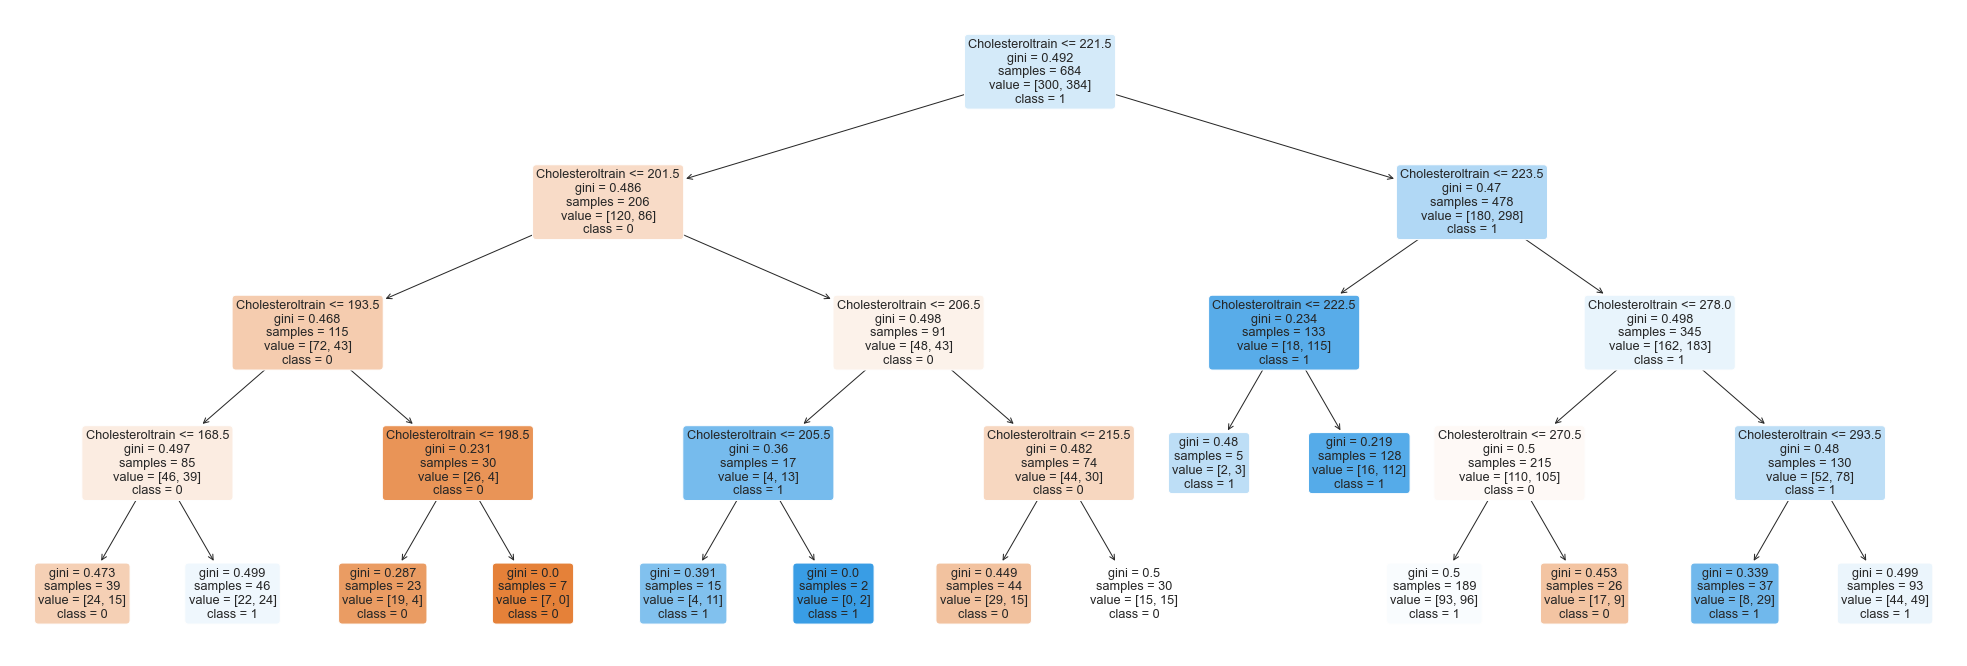

In [29]:
# Decision Tree using Train Data
dectree3 = DecisionTreeClassifier(max_depth = 4)  
dectree3.fit(Cholesteroltrain, HeartDiseasetrain)          

f = plt.figure(figsize=(35,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["Cholesteroltrain"], 
          class_names=["0","1"])

#### Decision Tree on MaxHR and Heart Disease

[Text(976.5, 587.0880000000001, 'MaxHRtrain <= 132.5\ngini = 0.492\nsamples = 684\nvalue = [300, 384]\nclass = 1'),
 Text(488.25, 456.624, 'MaxHRtrain <= 109.5\ngini = 0.348\nsamples = 299\nvalue = [67, 232]\nclass = 1'),
 Text(244.125, 326.1600000000001, 'MaxHRtrain <= 101.0\ngini = 0.24\nsamples = 86\nvalue = [12, 74]\nclass = 1'),
 Text(122.0625, 195.69600000000003, 'MaxHRtrain <= 99.5\ngini = 0.298\nsamples = 55\nvalue = [10, 45]\nclass = 1'),
 Text(61.03125, 65.23200000000008, 'gini = 0.198\nsamples = 45\nvalue = [5, 40]\nclass = 1'),
 Text(183.09375, 65.23200000000008, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(366.1875, 195.69600000000003, 'MaxHRtrain <= 107.0\ngini = 0.121\nsamples = 31\nvalue = [2, 29]\nclass = 1'),
 Text(305.15625, 65.23200000000008, 'gini = 0.172\nsamples = 21\nvalue = [2, 19]\nclass = 1'),
 Text(427.21875, 65.23200000000008, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = 1'),
 Text(732.375, 326.1600000000001, 'MaxHRtrain <= 111.5\ngi

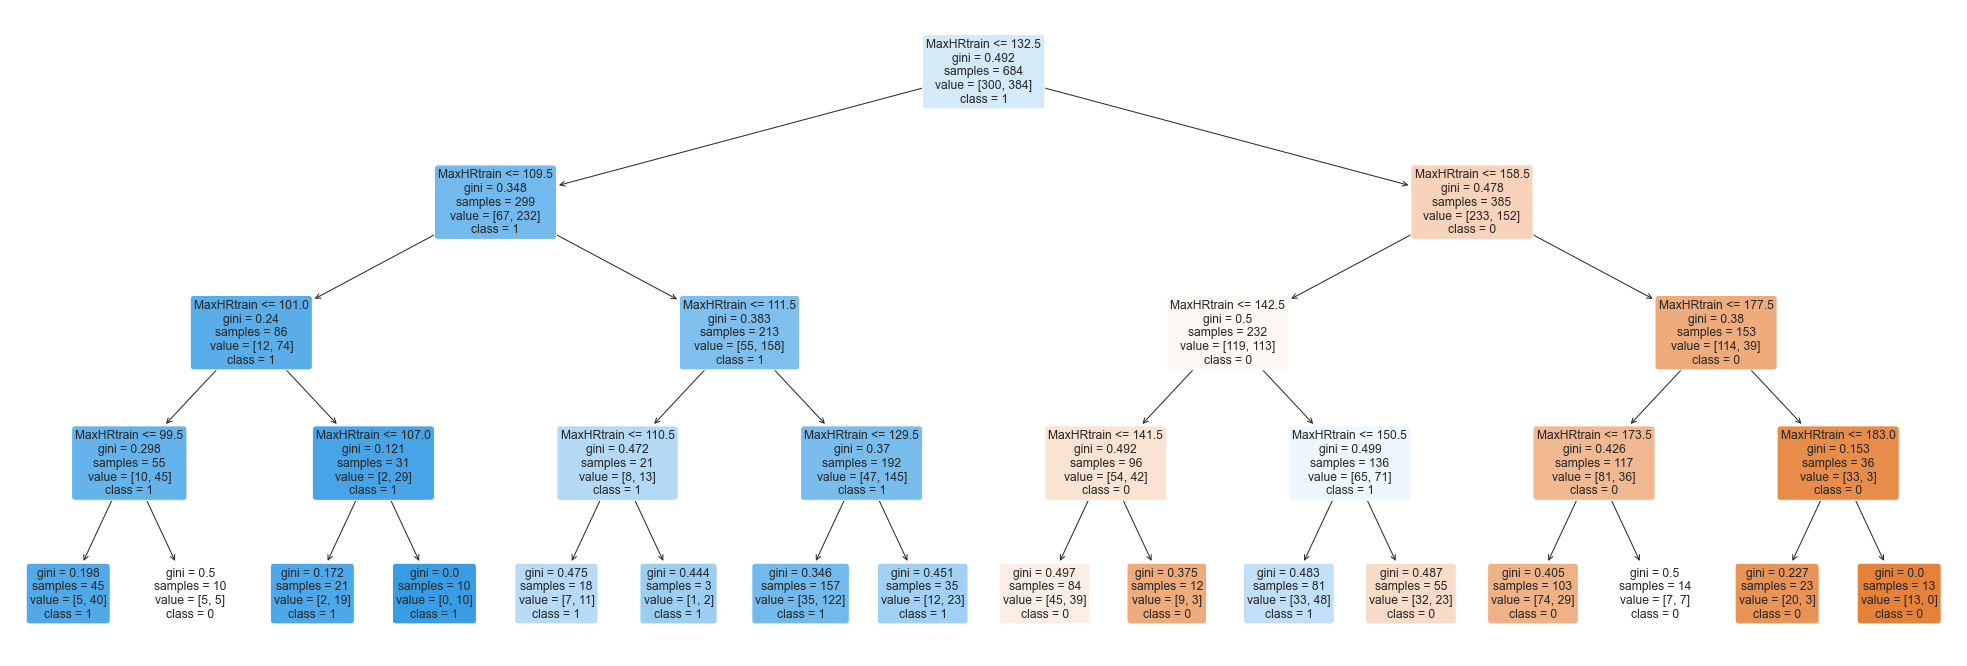

In [30]:
# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 4)  
dectree4.fit(MaxHRtrain, HeartDiseasetrain)          

f = plt.figure(figsize=(35,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["MaxHRtrain"], 
          class_names=["0","1"])

#### Goodness of Fit of the Model
Model selection based on Classification Accuracy, True Positive Rate, False Positive Rate

Age and Heart Disease(Train and Test)

Age and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 1.0
True Positive Rate 	: 0.8046875
False Positive Rate 	: 0.55


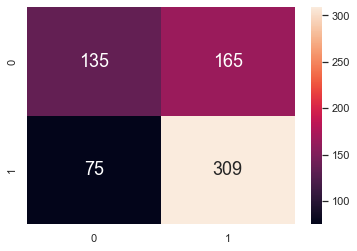

In [31]:
HeartDisease_train_pred = dectree1.predict(Agetrain)

dectree1 = DecisionTreeClassifier(max_depth = 4) 
dectree1.fit(Agetrain, HeartDiseasetrain)   

CM = confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Age and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree1.score(Agetrain, HeartDisease_train_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

Age and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 0.6943231441048034
True Positive Rate 	: 0.7560975609756098
False Positive Rate 	: 0.5471698113207547


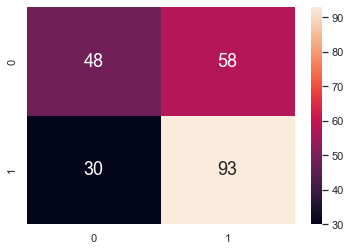

In [32]:
HeartDisease_test_pred = dectree1.predict(Agetest)

dectree1 = DecisionTreeClassifier(max_depth = 4) 
dectree1.fit(Agetest, HeartDiseasetest)   

CM = confusion_matrix(HeartDiseasetest, HeartDisease_test_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetest, HeartDisease_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Age and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree1.score(Agetest, HeartDiseasetest))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

RestingBP and Heart Disease (Train and Test)

RestingBP and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 1.0
True Positive Rate 	: 1.0
False Positive Rate 	: 0.9866666666666667


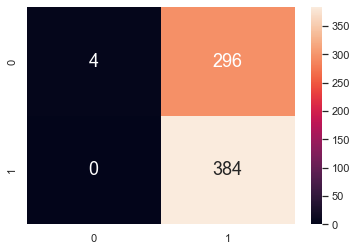

In [33]:
HeartDisease_train_pred = dectree2.predict(RestingBPtrain)

dectree2 = DecisionTreeClassifier(max_depth = 4) 
dectree2.fit(RestingBPtrain, HeartDiseasetrain)   

CM = confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("RestingBP and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree2.score(RestingBPtrain, HeartDisease_train_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

RestingBP and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 0.5807860262008734
True Positive Rate 	: 0.983739837398374
False Positive Rate 	: 1.0


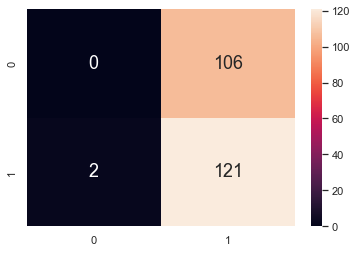

In [34]:
HeartDisease_test_pred = dectree2.predict(RestingBPtest)

dectree2 = DecisionTreeClassifier(max_depth = 4) 
dectree2.fit(RestingBPtest, HeartDiseasetest)   

CM = confusion_matrix(HeartDiseasetest, HeartDisease_test_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetest, HeartDisease_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("RestingBP and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree2.score(RestingBPtest, HeartDisease_test_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

Cholesterol and Heart Disease (Train and Test)

Cholesterol and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 1.0
True Positive Rate 	: 0.8489583333333334
False Positive Rate 	: 0.63


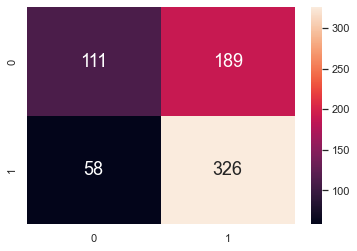

In [35]:
HeartDisease_train_pred = dectree3.predict(Cholesteroltrain)

dectree3 = DecisionTreeClassifier(max_depth = 4) 
dectree3.fit(Cholesteroltrain, HeartDiseasetrain)   

CM = confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Cholesterol and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree3.score(Cholesteroltrain, HeartDisease_train_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

Cholesterol and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 0.7467248908296943
True Positive Rate 	: 0.7886178861788617
False Positive Rate 	: 0.7547169811320755


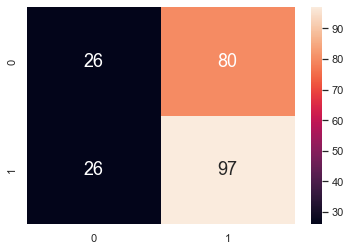

In [36]:
HeartDisease_test_pred = dectree3.predict(Cholesteroltest)

dectree3 = DecisionTreeClassifier(max_depth = 4) 
dectree3.fit(Cholesteroltest, HeartDiseasetest)   

CM = confusion_matrix(HeartDiseasetest, HeartDisease_test_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetest, HeartDisease_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Cholesterol and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree3.score(Cholesteroltest, HeartDisease_test_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

MaxHR and Heart Disease (Train and Test) 

MaxHR and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 1.0
True Positive Rate 	: 0.7161458333333334
False Positive Rate 	: 0.31666666666666665


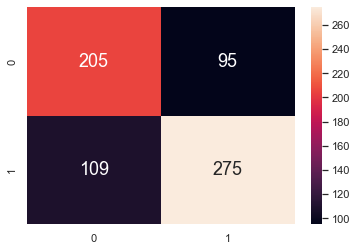

In [37]:
HeartDisease_train_pred = dectree4.predict(MaxHRtrain)

dectree4 = DecisionTreeClassifier(max_depth = 4) 
dectree4.fit(MaxHRtrain, HeartDiseasetrain)   

CM = confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetrain, HeartDisease_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("MaxHR and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree4.score(MaxHRtrain, HeartDisease_train_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

MaxHR and HeartDisease
Train Data, Max Depth = 4
Classification Accuracy : 0.7685589519650655
True Positive Rate 	: 0.7317073170731707
False Positive Rate 	: 0.4339622641509434


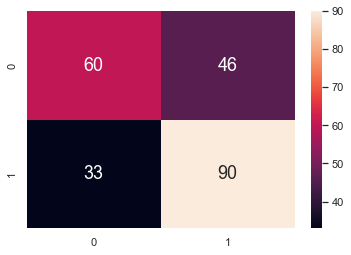

In [38]:
HeartDisease_test_pred = dectree4.predict(MaxHRtest)

dectree4 = DecisionTreeClassifier(max_depth = 4) 
dectree4.fit(MaxHRtest, HeartDiseasetest)   

CM = confusion_matrix(HeartDiseasetest, HeartDisease_test_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

sb.heatmap(confusion_matrix(HeartDiseasetest, HeartDisease_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("MaxHR and HeartDisease")
print("Train Data, Max Depth = 4")
print("Classification Accuracy :", dectree4.score(MaxHRtest, HeartDisease_test_pred))
print("True Positive Rate \t:", TPR)
print("False Positive Rate \t:", FPR)

All predictor variables have a classification accuracy of more than 65% with most of them having a false postive rate of less than 50%.

## Multi-Variate Classification Tree
Next, we will build a multivariate classification tree to predict HeartDisease using Age, RestingBP, Cholesterol, MaxHR.

Response Variable : **HeartDisease**     
Predictor Feature : **Age, RestingBP, Cholesterol, MaxHR**   

In [39]:
# Extract Response and Predictors
y = pd.DataFrame(heartData["HeartDisease"])
X = pd.DataFrame(heartData[["Age", "RestingBP", "Cholesterol", "MaxHR"]])

In [40]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (684, 1) (684, 4)
Test Set  : (229, 1) (229, 4)


In [41]:
# Summary Statistics for Response
y_train["HeartDisease"].value_counts()

1    382
0    302
Name: HeartDisease, dtype: int64

In [42]:
# Summary Statistics for Predictors
X_train.describe()

,Age,RestingBP,Cholesterol,MaxHR
count,684.00000,684.000000,684.000000,684.000000
mean,53.48538,132.750000,241.513158,136.988304
std,9.29781,18.016271,54.330409,24.924011
min,30.00000,80.000000,85.000000,60.000000
25%,47.00000,120.000000,214.000000,120.000000
50%,54.00000,130.000000,223.000000,138.000000
75%,60.00000,140.000000,270.250000,155.000000
max,77.00000,200.000000,603.000000,195.000000


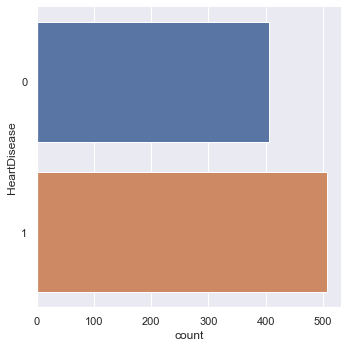

In [43]:
# Draw the distribution of Response
sb.catplot(y = "HeartDisease", data = HeartDisease, kind = "count")

In [44]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)      

DecisionTreeClassifier(max_depth=4)

[Text(976.5, 587.0880000000001, 'MaxHR <= 132.5\ngini = 0.493\nsamples = 684\nvalue = [302, 382]\nclass = 1'),
 Text(488.25, 456.624, 'Cholesterol <= 197.5\ngini = 0.372\nsamples = 304\nvalue = [75, 229]\nclass = 1'),
 Text(244.125, 326.1600000000001, 'Cholesterol <= 179.0\ngini = 0.482\nsamples = 42\nvalue = [17, 25]\nclass = 1'),
 Text(122.0625, 195.69600000000003, 'Age <= 56.5\ngini = 0.245\nsamples = 21\nvalue = [3, 18]\nclass = 1'),
 Text(61.03125, 65.23200000000008, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = 1'),
 Text(183.09375, 65.23200000000008, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = 1'),
 Text(366.1875, 195.69600000000003, 'MaxHR <= 114.5\ngini = 0.444\nsamples = 21\nvalue = [14, 7]\nclass = 0'),
 Text(305.15625, 65.23200000000008, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = 1'),
 Text(427.21875, 65.23200000000008, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]\nclass = 0'),
 Text(732.375, 326.1600000000001, 'Cholesterol <= 223.5\ngini = 0.345\nsamp

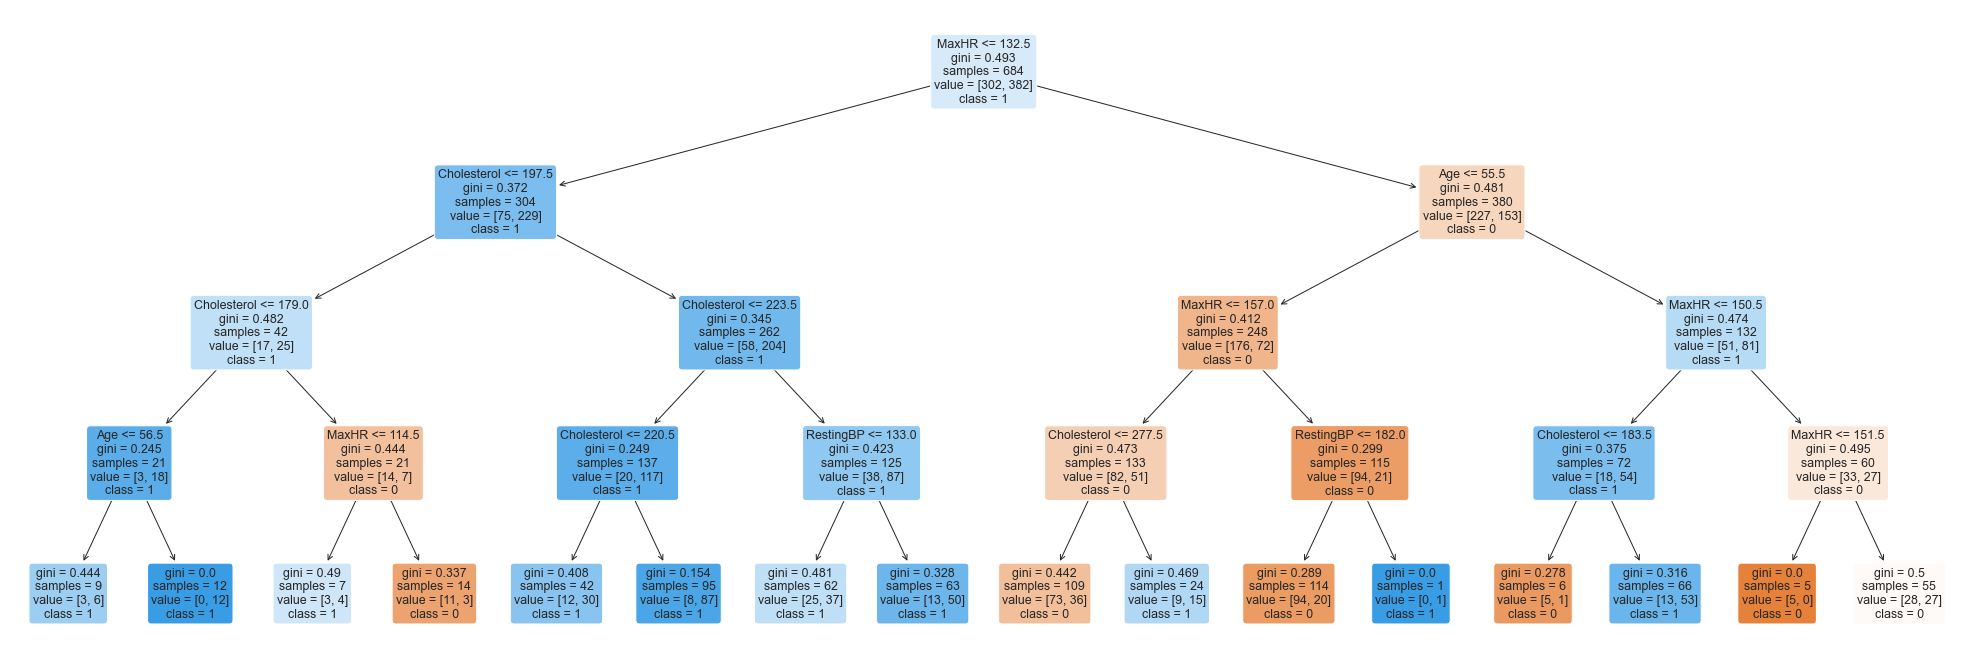

In [45]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(35,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7470760233918129
True Positive Rate 	        : 0.7722513089005235
False Positive Rate 	        : 0.2847682119205298

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7205240174672489
True Positive Rate 	        : 0.776
False Positive Rate 	        : 0.34615384615384615



<AxesSubplot:>

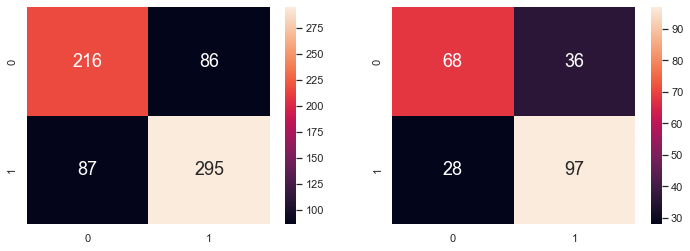

In [46]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
CM = confusion_matrix(y_train, y_train_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print("True Positive Rate \t        :", TPR)
print("False Positive Rate \t        :", FPR)
print()



# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
CM = confusion_matrix(y_test, y_test_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print("True Positive Rate \t        :", TPR)
print("False Positive Rate \t        :", FPR)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])





MaxHR can be seen as the variable that is most suitable to be used to predict HeartDisease as it is the root of the classication tree  followed by Age and Cholesterol.

The classification accuracy for both train and test set is above 70% with a false positive rate of less than 35%.

### Using Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
# Extract Response and Predictors
Y = pd.DataFrame(heartData["HeartDisease"])
X = pd.DataFrame(heartData[["Age", "RestingBP", "Cholesterol", "MaxHR"]])

# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (684, 1) (684, 4)
Test Set  : (229, 1) (229, 4)


In [69]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train.values.ravel())

Y_pred = model.predict(X_test)

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)


print(feature_scores)
print()
print('RestingBP has the lowest feature score.')
print('Accuracy score before removing variable RestingBP:', accuracy_score(Y_test, Y_pred))
print()
print()
print(classification_report(Y_test, Y_pred))

MaxHR          0.328702
Cholesterol    0.270771
Age            0.224312
RestingBP      0.176215
dtype: float64

RestingBP has the lowest feature score.
Accuracy score before removing variable RestingBP: 0.7292576419213974


              precision    recall  f1-score   support

           0       0.68      0.68      0.68        97
           1       0.77      0.77      0.77       132

    accuracy                           0.73       229
   macro avg       0.72      0.72      0.72       229
weighted avg       0.73      0.73      0.73       229



In [70]:
X_train = X_train.drop(['RestingBP'], axis=1)

X_test = X_test.drop(['RestingBP'], axis=1)

In [71]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train.values.ravel())
Y_pred = model.predict(X_test)
print()
print('Accuracy score after removing variable RestingBP:', accuracy_score(Y_test, Y_pred))


Accuracy score after removing variable RestingBP: 0.7074235807860262


<AxesSubplot:>

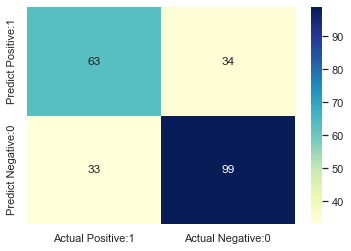

In [73]:
matrix = confusion_matrix(Y_test, Y_pred)

cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

After removing the least important variable according to the feature importance index earlier, the classification accuracy did not improve, in fact, performing worse than the multi-variate classification done earlier.

From this, we can infer that all the variables was chosen for the model is important for the prediction.

The random forest classification improves the accuracy slightly, at 73%.